# GÖZDE KIRBIZ 191180053 ASSIGNMENT 3

In [1]:
import pandas as pd

In [2]:
!pip install graphviz

In [3]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df=df.drop('Id', 1) 
df=df.rename(columns={'SepalLengthCm': 's_length', 'SepalWidthCm': 's_width','PetalLengthCm':'p_length','PetalWidthCm':'p_width'})

In [5]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.25, random_state=50)

In [6]:
import graphviz

In [7]:
from sklearn import tree
decision_tree_model_4d = tree.DecisionTreeClassifier()
decision_tree_model_4d = decision_tree_model_4d.fit(training_data[["p_length", "p_width","s_length", "s_width"]], training_data["Species"])

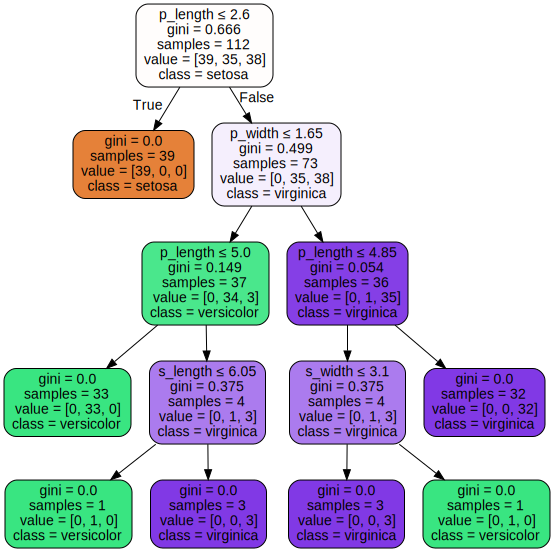

In [8]:
dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
                      feature_names=["p_length", "p_width", "s_length", "s_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
predictions = decision_tree_model_4d.predict(training_data[["p_length", "p_width", "s_length", "s_width"]])
accuracy_score(predictions, training_data["Species"])

1.0

In [10]:
predictions = decision_tree_model_4d.predict(testing_data[["p_length", "p_width", "s_length", "s_width"]])
accuracy_score(predictions, testing_data["Species"])

0.9473684210526315

In [11]:
recall_score(predictions, testing_data["Species"], average="weighted")

0.9473684210526315

In [12]:
precision_score(predictions, testing_data["Species"], average="weighted")

0.9473684210526315

In [13]:
f1_score(predictions, testing_data["Species"], average="weighted")

0.9473684210526315

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testing_data["Species"], predictions))
print(classification_report(testing_data["Species"], predictions))

[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



# Overfitting

Overfitting occurs when a model fits exactly against its training data. As a result the algorithm cannot perform well with unseen data. We can decide if it is overfitting or not by looking at training dataset's accuracy score and testing dataset's accuracy score. If training dataset's accuracy score is higher than testing dataset's, then overfitting occurs.

# Entropy criteria

In [15]:
decision_4d_entropy = tree.DecisionTreeClassifier(criterion='entropy')
decision_4d_entropy = decision_4d_entropy.fit(training_data[["p_length", "p_width","s_length", "s_width"]], training_data["Species"])

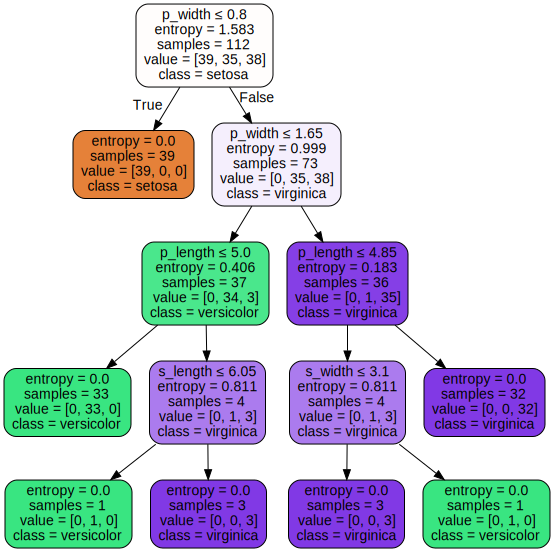

In [16]:
dot_data2 = tree.export_graphviz(decision_4d_entropy, out_file=None, 
                      feature_names=["p_length", "p_width", "s_length", "s_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph2 = graphviz.Source(dot_data2)
graph2

In [17]:
predictions = decision_4d_entropy.predict(training_data[["p_length", "p_width", "s_length", "s_width"]])
accuracy_score(predictions, training_data["Species"])

1.0

In [18]:
predictions = decision_4d_entropy.predict(testing_data[["p_length", "p_width", "s_length", "s_width"]])
accuracy_score(predictions, testing_data["Species"])

0.9473684210526315

In [19]:
recall_score(predictions, testing_data["Species"], average="weighted")

0.9473684210526315

In [20]:
precision_score(predictions, testing_data["Species"], average="weighted")

0.9473684210526315

In [21]:
f1_score(predictions, testing_data["Species"], average="weighted")

0.9473684210526315

In [22]:
print(confusion_matrix(testing_data["Species"], predictions))
print(classification_report(testing_data["Species"], predictions))

[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



# Overfitting

Still overfitting occurs since training data's accuracy score is higher than testing data's score.

# Questions

# 1. What is information gain?

Information Gain is used for splitting the dataset on its feautures. To do that, we need to calculate weighted entropy. The entropy represents the quality of the splitting the feauture. If the difference of the calculated weighted entropies are higher, then it means the more entropy removed and information gain is higher, which is what have been desired.
The formula of the information gain is: IG(Y,X) = E(Y) - E(Y/X)

# 2.What is Gini index?

Gini index is used for calculating the inequality among values of a variable. In decision trees, it shows the chance  misclassified sample while randomly assigning clusters.

# 3. What is Entropy?

Entropy, in general, means the measurity of disorder. It is calculated by a formula.
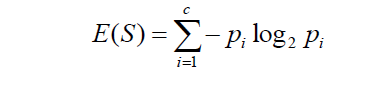
For every node, weighted entropy is calculated and then we decide if the node should be splitted or not.

# 4. What is a confusion matrix?


Confusion matrix shows the prediction results. The number of correct and incorrect predictions written in the matrix. It gives a insight of the errors of our prediction. It is calculated by predicting each row in the dataset and count the incorrect and correct predictions. Confusion matrix uses true positive, true negative, false positive, false negative results. True means that the prediction is correct, false means prediction is wrong.

# 5. What is accuracy?



We have splitted our dataset into training and testing data. We are calculating our correct and incorrect predictions in each splitted dataset and then we divide the correct ones to number of all samples. That gives us the accuracy score. In order to gain correct information by using accuracy, the dataset should be splitted in balance, otherwise it can give us wrong insight.
Accuracy= (TP+TN)/(TP+TN+FP+FN)

# 6. What is precision?

If the classes are very imbalanced then using precision would be useful. The precision score can be used in the scenario where the machine learning model is required to identify all positive examples without any false positives. The formula is:
Precision Score = TP / (FP + TP)

# 7. What is recall?

Recall can be used if the dataset is very imbalanced. Because it uses true positive and false negative values. 
The formula is:
Recall Score = TP / (FN + TP)

# 8. What is f-1 score?

F1-score = 2 * Precision * Recall / (Precision + Recall) 
The harmonic mean of precision and recall is given by the F1 score. Precision and Recall are both given equal weight. It's frequently utilized if a single metric that gives us model's quality.
